<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/Leer_Csv_Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib
import pylab as plt
%matplotlib inline

In [18]:
#Permisos
drive.mount('/gdrive')

#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Tesis
 Leer-Csv-Prueba.ipynb        Prueba                  train.csv
'Leer CSV train.ipynb'        sample_submission.csv   train_images/
'Leer imágenes-Tesis.ipynb'   test_images/


In [19]:
#Lectura archivo csv train
df_train = pd.read_csv('train.csv')
df_train.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


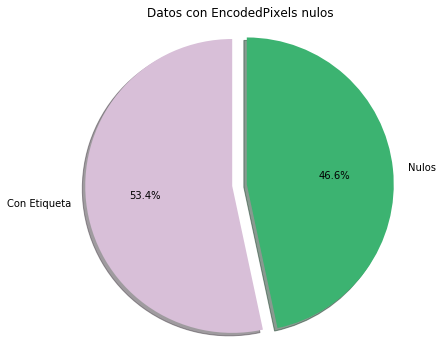

In [20]:
# Porcentaje de nulos
labels = 'Con Etiqueta', 'Nulos'
sizes = [df_train.EncodedPixels.count(), len(df_train) - df_train.EncodedPixels.count()]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#D8BFD8','#3CB371']
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colores, shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Datos con EncodedPixels nulos')
plt.show()

In [21]:
# Separar columna
df_split = df_train["Image_Label"].str.split("_", n = 1, expand = True)
# Agregar nueva columna a df_train
df_train['Image'] = df_split[0]
df_train['Label'] = df_split[1]

df_train.head()

,Image_Label,EncodedPixels,Image,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,0011165.jpg_Gravel,NaN,0011165.jpg,Gravel
3,0011165.jpg_Sugar,NaN,0011165.jpg,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [22]:
# create dummy columns for each cloud type
corr_df = pd.get_dummies(df_train, columns = ['Label'])
# fill null values with '-1'
corr_df = corr_df.fillna('-1')

# define a helper function to fill dummy columns
def get_dummy_value(row, cloud_type):
    ''' Get value for dummy column '''
    if cloud_type == 'fish':
        return row['Label_Fish'] * (row['EncodedPixels'] != '-1')
    if cloud_type == 'flower':
        return row['Label_Flower'] * (row['EncodedPixels'] != '-1')
    if cloud_type == 'gravel':
        return row['Label_Gravel'] * (row['EncodedPixels'] != '-1')
    if cloud_type == 'sugar':
        return row['Label_Sugar'] * (row['EncodedPixels'] != '-1')
    
# fill dummy columns
corr_df['Label_Fish'] = corr_df.apply(lambda row: get_dummy_value(row, 'fish'), axis=1)
corr_df['Label_Flower'] = corr_df.apply(lambda row: get_dummy_value(row, 'flower'), axis=1)
corr_df['Label_Gravel'] = corr_df.apply(lambda row: get_dummy_value(row, 'gravel'), axis=1)
corr_df['Label_Sugar'] = corr_df.apply(lambda row: get_dummy_value(row, 'sugar'), axis=1)

# check the result
corr_df.head()

,Image_Label,EncodedPixels,Image,Label_Fish,Label_Flower,Label_Gravel,Label_Sugar
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,1,0,0,0
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,0,1,0,0
2,0011165.jpg_Gravel,-1,0011165.jpg,0,0,0,0
3,0011165.jpg_Sugar,-1,0011165.jpg,0,0,0,0
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,1,0,0,0


In [0]:
def rle_to_mask(rle_string, height, width):

    rows, cols = height, width
    if rle_string == '-1':
      img = np.zeros(rows*cols, dtype=np.uint8)
      img = img.reshape(1,rows*cols)
      img = img.T
      return img
    else:
      rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
      rle_pairs = np.array(rle_numbers).reshape(-1,2)
      img = np.zeros(rows*cols, dtype=np.uint8)
      for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
      img = img.reshape(1,cols*rows)
      img = img.T
      return img

In [26]:
## loop para crear todo mask
mask = []
for i in corr_df['EncodedPixels'][0:5]:
  # Load image
  mk = rle_to_mask(i,1400,2100)
  mask.append(mk)

mask = np.asarray(mask)
mask.shape

(5, 2940000, 1)